# Table of Contents
 <p>

In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from __future__ import print_function, division
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a,b,x): return a*x+b

In [3]:
a=3.
b=8.

In [4]:
n=30
x = random(n)
y = lin(a,b,x)

In [5]:
x

array([ 0.2512,  0.5146,  0.8023,  0.293 ,  0.4106,  0.3832,  0.852 ,  0.583 ,  0.6944,  0.2702,
        0.6431,  0.1577,  0.3531,  0.0043,  0.5613,  0.9786,  0.7477,  0.1809,  0.9352,  0.6228,
        0.3445,  0.9943,  0.9327,  0.1637,  0.9509,  0.2711,  0.8829,  0.7033,  0.3737,  0.8109])

In [6]:
y

array([  8.7536,   9.5438,  10.4068,   8.8791,   9.2319,   9.1495,  10.5561,   9.7489,  10.0831,
         8.8105,   9.9294,   8.4732,   9.0592,   8.0128,   9.6838,  10.9359,  10.2432,   8.5426,
        10.8056,   9.8683,   9.0336,  10.983 ,  10.7981,   8.4911,  10.8528,   8.8132,  10.6486,
        10.11  ,   9.1212,  10.4327])

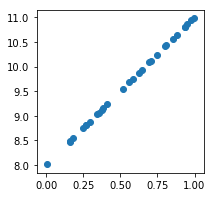

In [7]:
plt.scatter(x,y)

In [8]:
def sse(y,y_pred): return ((y-y_pred)**2).sum()
def loss(y,a,b,x): return sse(y, lin(a,b,x))
def avg_loss(y,a,b,x): return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess=-1.
b_guess=1.
avg_loss(y, a_guess, b_guess, x)

9.2937

In [10]:
lr=0.01
# d[(y-(a*x+b))**2,b] = 2 (b + a x - y)      = 2 (y_pred - y)
# d[(y-(a*x+b))**2,a] = 2 x (b + a x - y)    = x * dy/db

In [11]:
def upd():
    global a_guess, b_guess
    y_pred = lin(a_guess, b_guess, x)
    dydb = 2 * (y_pred - y)
    dyda = x*dydb
    a_guess -= lr*dyda.mean()
    b_guess -= lr*dydb.mean()

In [ ]:
fig = plt.figure(dpi=100, figsize=(5, 4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10): upd()
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani